In [1]:
import json 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import cv2
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


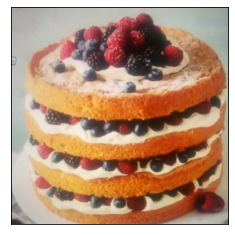

In [2]:
import cv2
img = cv2.imread("/content/gdrive/MyDrive/challange/dataset/train/images/006434.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.xticks([])
plt.yticks([])

def desired_output(img_shape, segmentations):
        desired_output = np.zeros((img_shape[0], img_shape[1], len(categories)), dtype=np.int32)

        for i in segmentations:
          t = np.zeros((img_shape[0], img_shape[1], 1), dtype=np.int32)
          for seg in segmentations[i]:
              s = np.array(seg, dtype=np.int32).reshape((-1, 2))
              t = cv2.fillPoly(t, [s], 255)

          desired_output[:, :, i] = t.squeeze()

        return desired_output / 255
        

In [22]:
file = open("gdrive/MyDrive/challange/dataset/train/annotations.json", "r")
annotations = json.loads(file.read())
ann = pd.DataFrame(annotations['annotations'])
mapping = {item:i for i, item in enumerate(ann["category_id"].unique())}
#ann["category_id"] = ann["category_id"].apply(lambda x: mapping[x])
images = pd.DataFrame(annotations['images']).set_index('id')
categories = pd.DataFrame(annotations['categories'])
#categories['id'] = categories['id'].apply(lambda x: mapping[x])
categories = categories.set_index('id')

In [23]:
counts = ann.groupby(by='category_id').count()['image_id']
print("Mean:", np.mean(counts.to_numpy()))
print("Variance:", np.var(counts.to_numpy()))

Mean: 144.04761904761904
Variance: 42576.74864817722


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


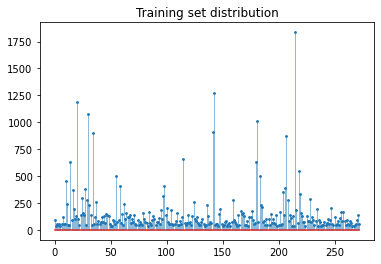

In [27]:
markerline, stemline, baseline = plt.stem(range(273), counts.to_numpy());
plt.setp(stemline, linewidth = 0.5);
plt.setp(markerline, markersize = 1.8);
plt.title('Training set distribution');

In [ ]:
#np.argmin(counts.to_numpy())
categories = pd.DataFrame(annotations['categories']).set_index('id')
index = counts.index[np.argmin(counts.to_numpy())]
categories.loc[index]

name             veggie-burger
name_readable    Veggie burger
supercategory             food
Name: 1942, dtype: object

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


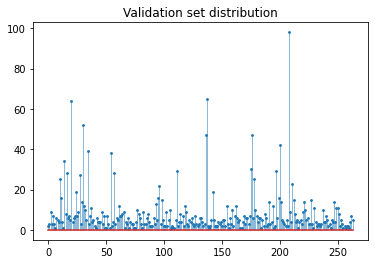

In [29]:
val_file = open("/content/gdrive/MyDrive/challange/dataset/val/annotations.json", "r")
val_annotations = json.loads(val_file.read())

val_ann = pd.DataFrame(val_annotations['annotations'])
val_counts = val_ann.groupby(by='category_id').count()['image_id']

markerline, stemline, baseline = plt.stem(range(264), val_counts.to_numpy());
plt.setp(stemline, linewidth = 0.5);
plt.setp(markerline, markersize = 1.8);
plt.title('Validation set distribution');